# Building a Street Map with Graphs using Neo4j

### References
- Video: https://www.youtube.com/watch?v=Z4XZgsbaD9c&t=49s
- OpenStreetMap: https://www.openstreetmap.org/#map=17/-12.092304/-77.
- OSMnx (Python package to handle OpenStreetMap): https://osmnx.readthedocs.io/en/stable/getting-started.html


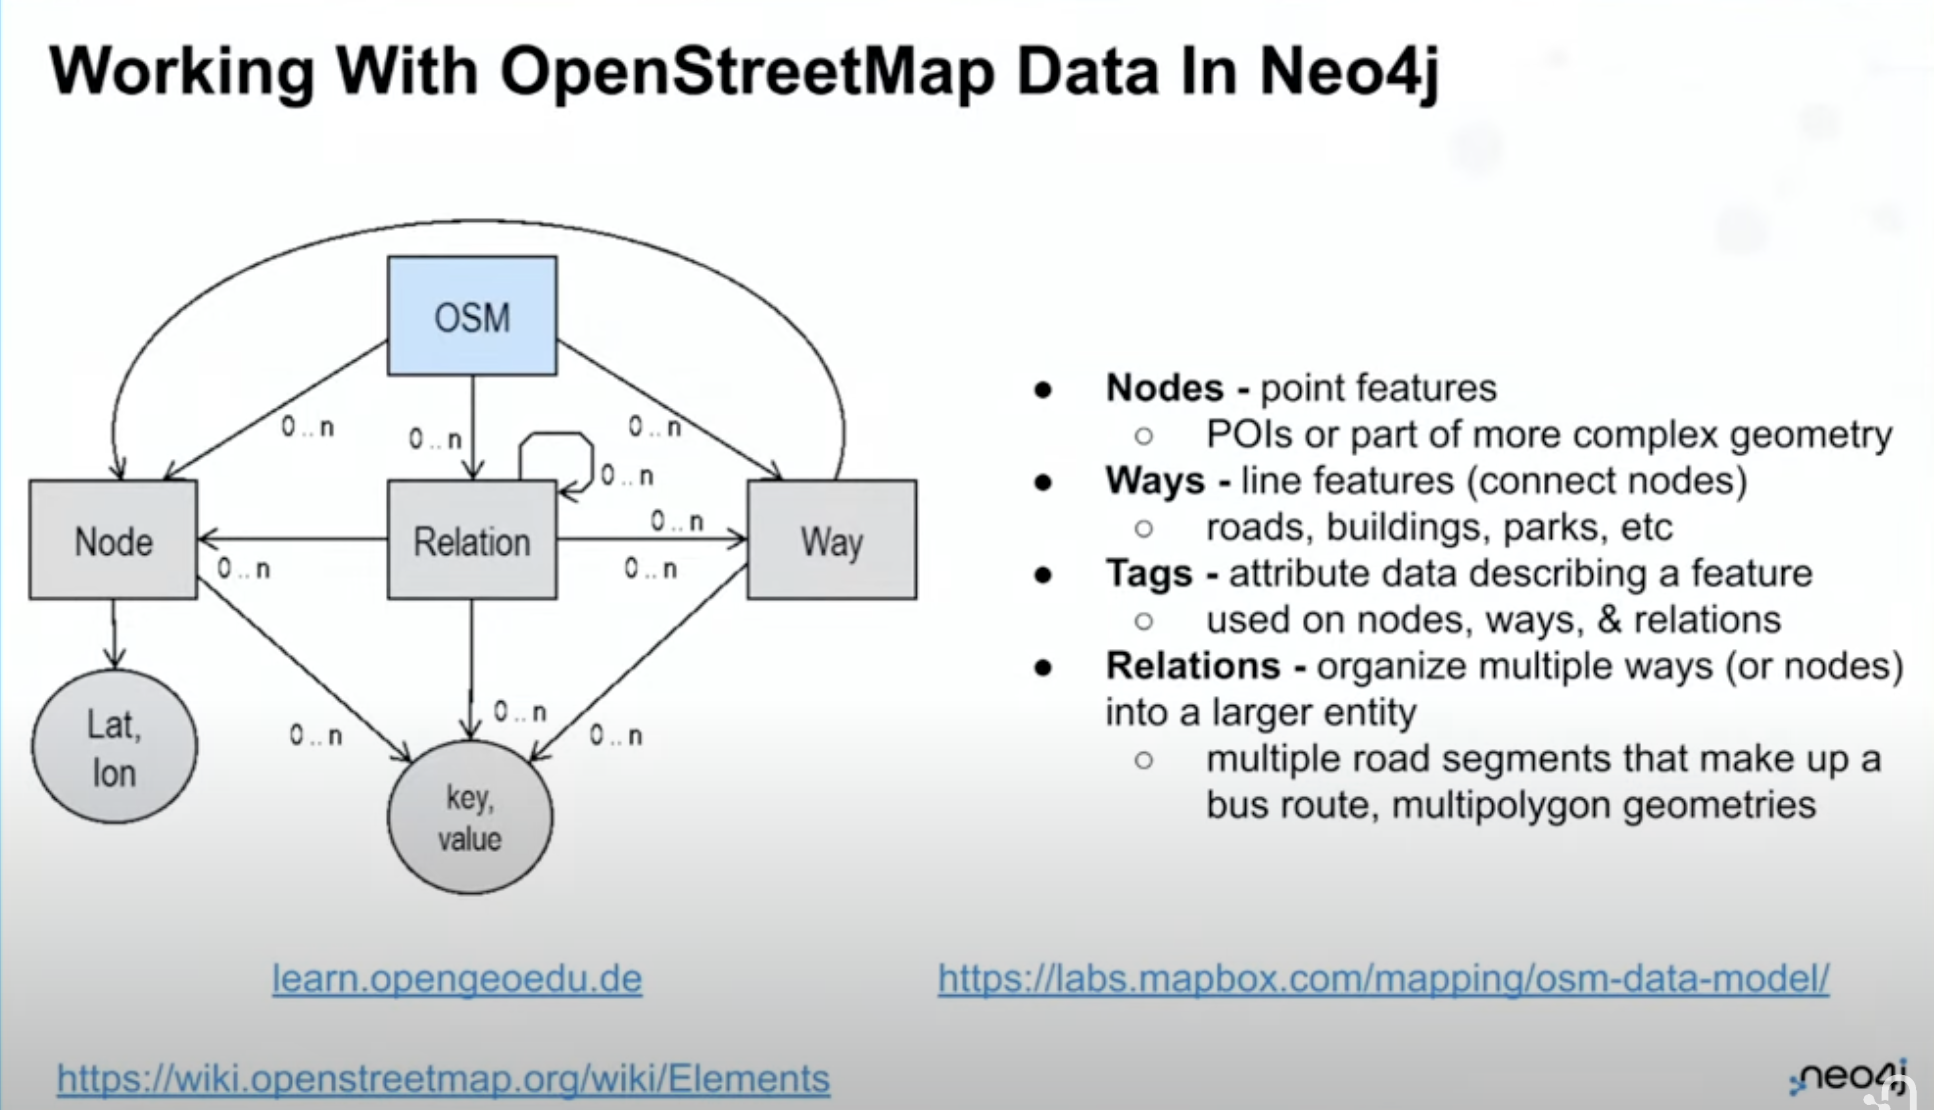

## Simplifying Networks for Routing

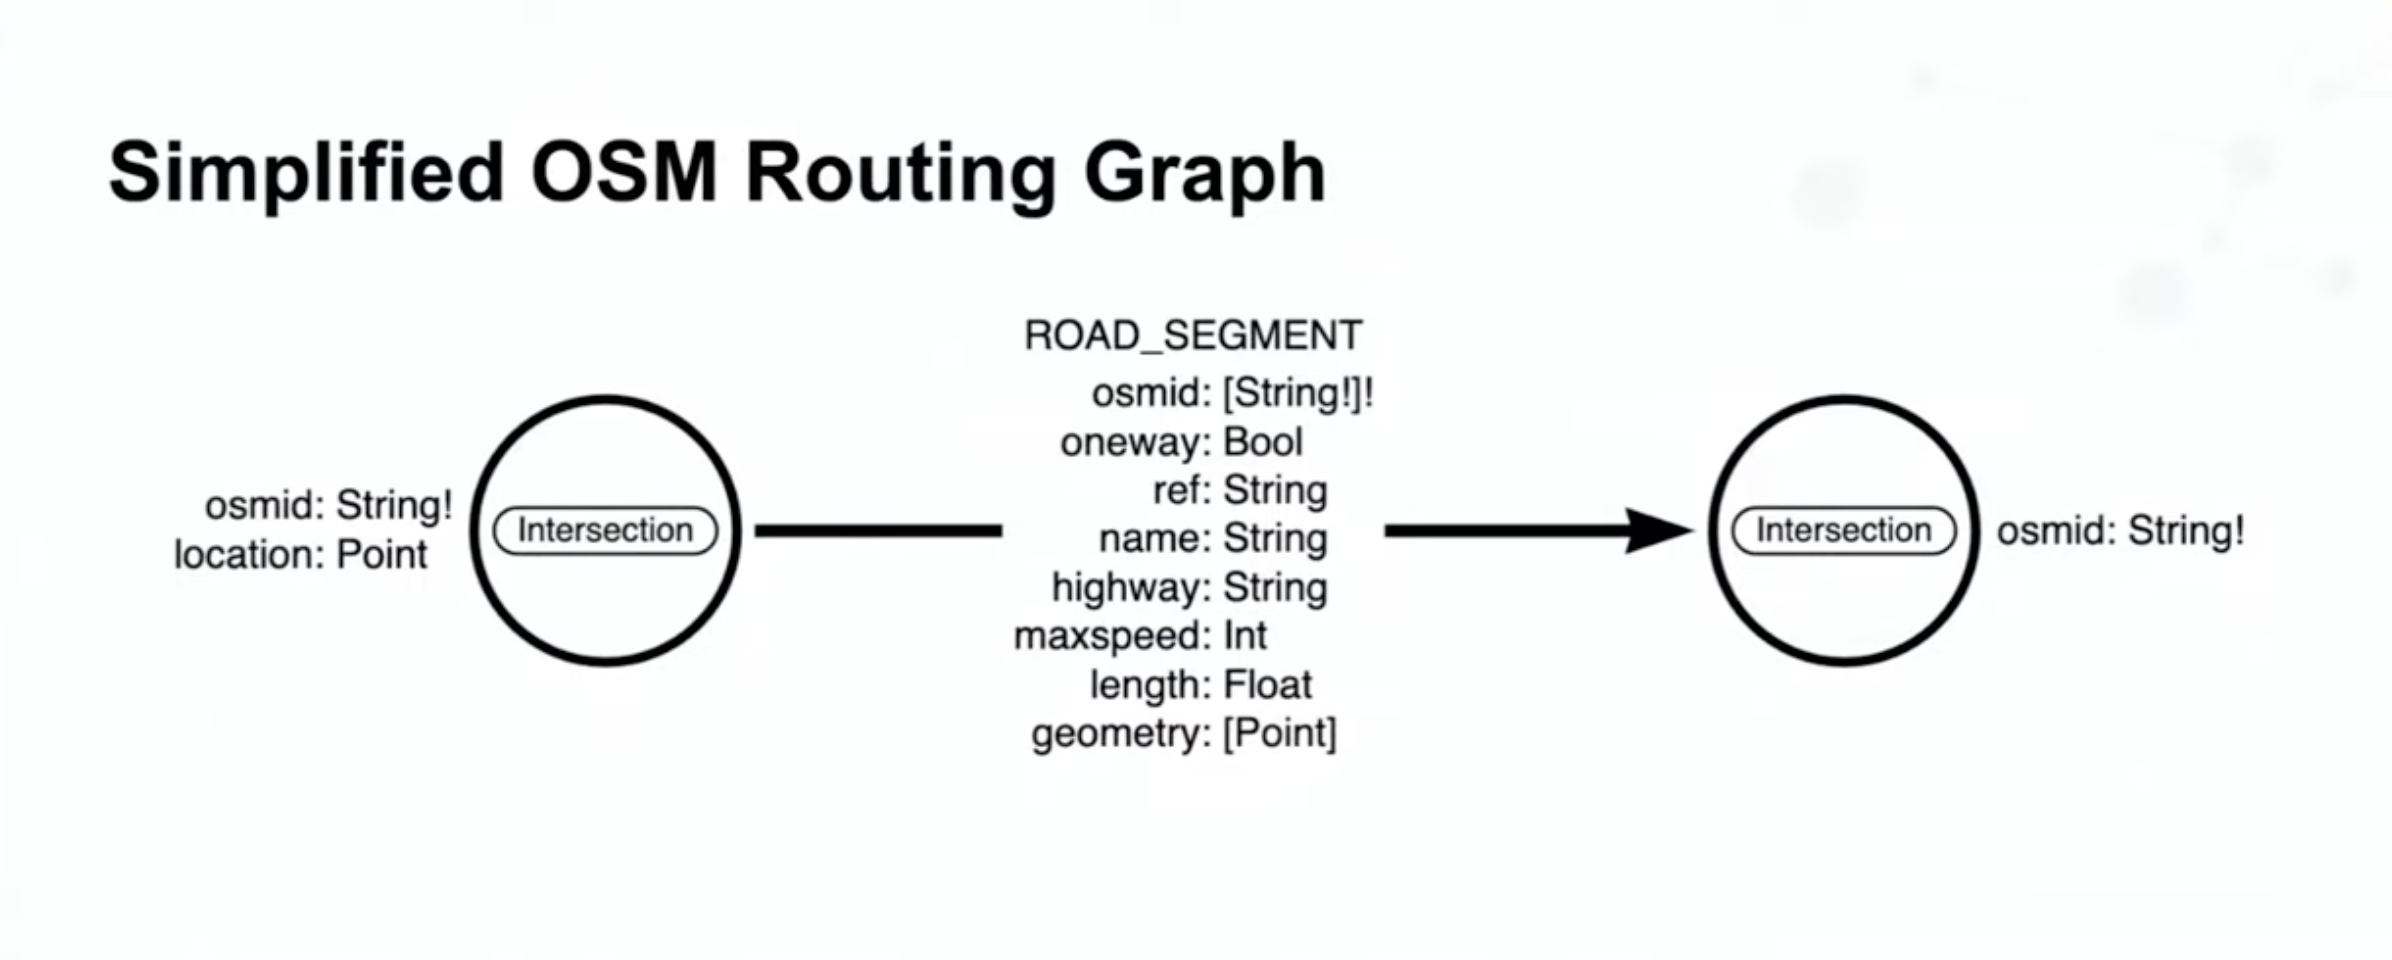

## Setting Up Neo4j Configuration

You need a Neo4j Aura instance already created.

Access the Workspace: https://workspace-preview.neo4j.io/workspace/query

In [1]:
%pip install neo4j


[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import neo4j
from dotenv import load_dotenv

load_dotenv(os.path.join(os.getcwd(), '..', '.env'))

NEO4J_URI = os.getenv('NEO4J_URI') 
NEO4J_USER = os.getenv('NEO4J_USER')
NEO4J_PASSWORD = os.getenv('NEO4J_PASSWORD') 

driver = neo4j.GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD)) # -> configure the Neo4j Instance

CYPHER_QUERY = """
MATCH (n) RETURN COUNT(n) AS node_count
"""

def get_node_count(tx):
    results = tx.run(CYPHER_QUERY)
    df = results.to_df()
    return df

with driver.session() as session:
    df = session.execute_read(get_node_count)


In [6]:
df

,node_count
0,15355


## OpenStreetMap Road Network

We will use OSMnx Python Library to load maps from OpenStreetMap, and then convert them into graphs

In [ ]:
%pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 5.1 MB/s eta 0:00:00


In [ ]:
distritos = [
    "San Borja", "Surquillo", "San Isidro", "Surco", "Miraflores",
    "Rímac", "Cercado de Lima", "La Victoria", "Breña", "San Miguel",
    "Pueblo Libre", "Jesús María", "Lince", "Magdalena del Mar",
    "San Luis", "Barranco"
]

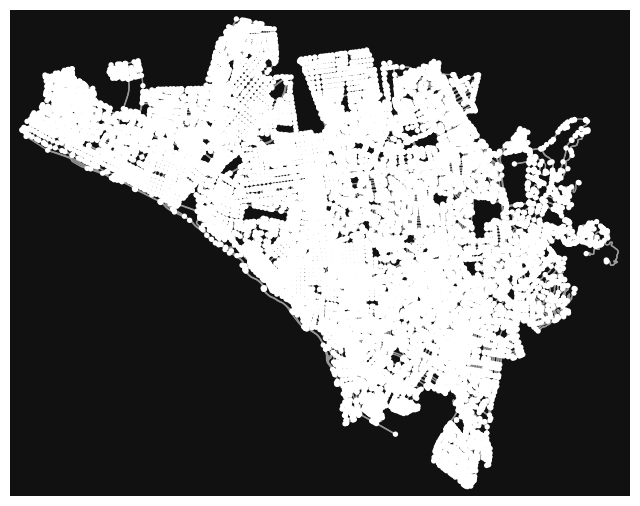

In [ ]:
import osmnx as ox
import geopandas as gpd

def get_graph_from_districts_list(districts):
    places = [f"{district}, Lima, Peru" for district in districts]
    G = ox.graph_from_place(places, network_type="drive")

    return G

G = get_graph_from_districts_list(distritos)

fig, ax = ox.plot_graph(G)

In [ ]:
gdf_nodes, gdf_relationships = ox.graph_to_gdfs(G)
gdf_nodes.reset_index(inplace=True)
gdf_relationships.reset_index(inplace=True)

,osmid,y,x,street_count,highway,ref,junction,railway,geometry
0,107774938,-12.059757,-77.041808,3,NaN,NaN,NaN,NaN,POINT (-77.04181 -12.05976)
1,107774940,-12.060004,-77.042051,3,NaN,NaN,NaN,NaN,POINT (-77.04205 -12.06)
2,108009619,-12.098953,-77.050891,3,traffic_signals,NaN,NaN,NaN,POINT (-77.05089 -12.09895)
3,108009621,-12.098928,-77.050627,3,NaN,NaN,NaN,NaN,POINT (-77.05063 -12.09893)
4,108009622,-12.098884,-77.050107,3,NaN,NaN,NaN,NaN,POINT (-77.05011 -12.09888)
...,...,...,...,...,...,...,...,...,...
15350,12746038473,-12.149553,-76.991371,4,NaN,NaN,NaN,NaN,POINT (-76.99137 -12.14955)
15351,12793723934,-12.159598,-76.992360,1,NaN,NaN,NaN,NaN,POINT (-76.99236 -12.1596)
15352,12812136168,-12.075186,-77.091397,3,NaN,NaN,NaN,NaN,POINT (-77.0914 -12.07519)
15353,12812136169,-12.075341,-77.091438,3,NaN,NaN,NaN,NaN,POINT (-77.09144 -12.07534)


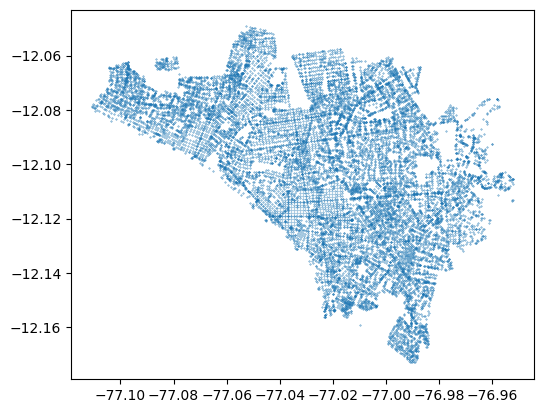

In [ ]:
gdf_nodes.plot(markersize=0.1)
gdf_nodes

,u,v,key,osmid,highway,junction,lanes,maxspeed,name,oneway,reversed,length,geometry,bridge,access,ref,tunnel,width
0,107774938,107774940,0,1021325945,primary,circular,4,40,Plaza Francisco Bolognesi,True,False,38.765165,"LINESTRING (-77.04181 -12.05976, -77.04188 -12...",NaN,NaN,NaN,NaN,NaN
1,107774940,4334170917,0,1021325945,primary,circular,4,40,Plaza Francisco Bolognesi,True,False,15.465307,"LINESTRING (-77.04205 -12.06, -77.04208 -12.06...",NaN,NaN,NaN,NaN,NaN
2,107774940,915282101,0,"[1155859546, 1341594077]",primary,NaN,3,50,Avenida Arica,True,False,77.125953,"LINESTRING (-77.04205 -12.06, -77.04212 -12.06...",NaN,NaN,NaN,NaN,NaN
3,108009619,108009621,0,892629816,secondary,NaN,3,60,Avenida Aurelio Miró Quesada,False,False,28.866976,"LINESTRING (-77.05089 -12.09895, -77.05063 -12...",NaN,NaN,NaN,NaN,NaN
4,108009619,262728248,0,1150811346,secondary,NaN,2,60,Avenida Aurelio Miró Quesada,False,False,28.155583,"LINESTRING (-77.05089 -12.09895, -77.05115 -12...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33529,12812136168,12812136169,0,1383820548,residential,NaN,NaN,NaN,NaN,False,True,17.902242,"LINESTRING (-77.0914 -12.07519, -77.09144 -12....",NaN,NaN,NaN,NaN,NaN
33530,12812136169,5437755532,0,60104952,residential,NaN,NaN,30,Avenida Carlos Gonzalez,True,False,65.483656,"LINESTRING (-77.09144 -12.07534, -77.09085 -12...",NaN,NaN,NaN,NaN,NaN
33531,12812136169,12812136168,0,1383820548,residential,NaN,NaN,NaN,NaN,False,False,17.902242,"LINESTRING (-77.09144 -12.07534, -77.0914 -12....",NaN,NaN,NaN,NaN,NaN
33532,12812218868,4345080190,0,654035908,residential,NaN,NaN,30,Avenida Du Petit Thouars,True,False,9.577092,"LINESTRING (-77.01338 -12.14229, -77.01344 -12...",NaN,NaN,NaN,NaN,NaN


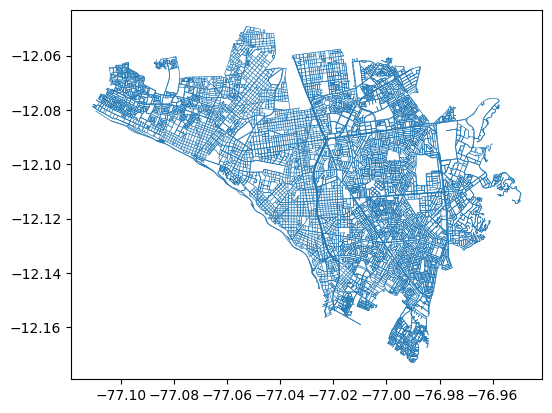

In [ ]:
gdf_relationships.plot(markersize=0.01, linewidth=0.5)
gdf_relationships

## Using Neo4j to represent graphs in our Instance

In [ ]:
# First of all, let's define Cypher queries to create constraints and indexes
constraint_query = "CREATE CONSTRAINT IF NOT EXISTS FOR (i:Intersection) REQUIRE i.osmid IS UNIQUE"
rel_index_query = "CREATE INDEX IF NOT EXISTS FOR ()-[r:ROAD_SEGMENT]-() ON r.osmids"
address_constraint_query = "CREATE CONSTRAINT IF NOT EXISTS FOR (a:Address) REQUIRE a.id IS UNIQUE"
point_index_query = "CREATE POINT INDEX IF NOT EXISTS FOR (i:Intersection) ON i.location"

In [ ]:
# Cypher query to import our road network nodes GeoDataFrame
node_query = '''
    UNWIND $rows AS row
    WITH row WHERE row.osmid IS NOT NULL
    MERGE (i:Intersection {osmid: row.osmid})
        SET i.location =
         point({latitude: row.y, longitude: row.x }),
            i.ref = row.ref,
            i.highway = row.highway,
            i.street_count = toInteger(row.street_count)
    RETURN COUNT(*) as total
'''

# Cypher query to import our road network relationships GeoDataFrame
rels_query = '''
    UNWIND $rows AS road
    MATCH (u:Intersection {osmid: road.u})
    MATCH (v:Intersection {osmid: road.v})
    MERGE (u)-[r:ROAD_SEGMENT {osmid: road.osmid}]->(v)
        SET r.oneway = road.oneway,
            r.lanes = road.lanes,
            r.ref = road.ref,
            r.name = road.name,
            r.highway = road.highway,
            r.max_speed = road.maxspeed,
            r.length = toFloat(road.length)
    RETURN COUNT(*) AS total
  '''

In [ ]:
def create_constraints(tx):
    results = tx.run(constraint_query)
    results = tx.run(rel_index_query)
    results = tx.run(address_constraint_query)
    results = tx.run(point_index_query)

In [ ]:
def insert_data(driver, query, rows, batch_size=100):
    total = 0
    batch_count = (len(rows) + batch_size - 1) // batch_size  # Ceiling division to get total batches

    for batch in range(batch_count):
        start_idx = batch * batch_size
        end_idx = min((batch + 1) * batch_size, len(rows))

        # Create a batch of data
        batch_data = rows[start_idx:end_idx]

        # Use a separate transaction for each batch
        with driver.session() as session:
            # Execute in a separate transaction
            results = session.execute_write(
                lambda tx: tx.run(
                    query,
                    parameters={'rows': batch_data.to_dict('records')}
                ).data()
            )

            if results and len(results) > 0:
                total += results[0]['total']

            print(f"Processed batch {batch+1}/{batch_count} - Total nodes: {total}")

In [ ]:
# Run the nodes and relationships
with driver.session() as session:
    session.execute_write(create_constraints)

insert_data(driver, node_query, gdf_nodes.drop(columns=['geometry']), batch_size=50)
insert_data(driver, rels_query, gdf_relationships.drop(columns=['geometry']), batch_size=50)

Processed batch 1/308 - Total nodes: 50
Processed batch 2/308 - Total nodes: 100
Processed batch 3/308 - Total nodes: 150
Processed batch 4/308 - Total nodes: 200
Processed batch 5/308 - Total nodes: 250
Processed batch 6/308 - Total nodes: 300
Processed batch 7/308 - Total nodes: 350
Processed batch 8/308 - Total nodes: 400
Processed batch 9/308 - Total nodes: 450
Processed batch 10/308 - Total nodes: 500
Processed batch 11/308 - Total nodes: 550
Processed batch 12/308 - Total nodes: 600
Processed batch 13/308 - Total nodes: 650
Processed batch 14/308 - Total nodes: 700
Processed batch 15/308 - Total nodes: 750
Processed batch 16/308 - Total nodes: 800
Processed batch 17/308 - Total nodes: 850
Processed batch 18/308 - Total nodes: 900
Processed batch 19/308 - Total nodes: 950
Processed batch 20/308 - Total nodes: 1000
Processed batch 21/308 - Total nodes: 1050
Processed batch 22/308 - Total nodes: 1100
Processed batch 23/308 - Total nodes: 1150
Processed batch 24/308 - Total nodes: 12

## Adding addresses to the Graph (Street name + number)

In [ ]:
!pip install neo4j

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.3/312.3 kB 4.7 MB/s eta 0:00:00


In [ ]:
import neo4j
import random
import hashlib
import time
import logging
import requests
from google.colab import userdata

In [ ]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

In [ ]:
NEO4J_URI = userdata.get('NEO4J_URI') # neo4j+s://186be3de.databases.neo4j.io
NEO4J_USER = "neo4j"
NEO4J_PASSWORD = userdata.get('NEO4J_PASSWORD') # 8O5EwFIh0tR4uM2DAGUhaRjWvC6KOBHBbDpMPlB6Od0

BATCH_SIZE = 50

In [ ]:
def consult_nominatim(lat, lon):
    url = f"https://nominatim.openstreetmap.org/reverse?lat={lat}&lon={lon}&format=json"
    headers = {
        "User-Agent": "YourAppName/1.0 (contact: jalbertoqz@gmail.com)"
    }

    print(url)

    try:
      response = requests.get(url, headers=headers)
      if response.status_code == 200:
        data = response.json()
        # print(data)
        address_data = data.get("address", {})
        # print(address_data)
        street_name = address_data.get("road", "")
        # print(street_name)
        house_number = address_data.get("house_number", "")
        # print(house_number)

        return street_name, house_number

      else:
        print(f"Error al hacer request a la API: {response.status_code}")
        return None, None
    except Exception as e:
        print(f"Error inesperado: {e}")
        return None, None


street_num, house_num = consult_nominatim(-12.1259848, -77.029461)
print(street_num, house_num)

https://nominatim.openstreetmap.org/reverse?lat=-12.1259848&lon=-77.029461&format=json
Avenida José Larco 799


In [ ]:
# class AddressAssigner:
#     def __init__(self, uri, auth):
#         self.driver = neo4j.GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))
#         self.processed_count = 0
#         self.lima_center_x = -77.02  # Aproximado centro de Lima (longitud)
#         self.lima_center_y = -12.05  # Aproximado centro de Lima (latitud)

#     def close(self):
#         self.driver.close()

#     def get_total_nodes(self):
#         with self.driver.session() as session:
#             # Cambiar para no buscar por la propiedad address que aún no existe
#             result = session.run("MATCH (n:Intersection) RETURN count(n) AS count")
#             return result.single()["count"]

#     def generate_house_number(self, x, y, osmid):
#         """Genera un número de casa basado en coordenadas y ID"""
#         # Crear un hash usando coordenadas y ID para consistencia
#         hash_input = f"{x}:{y}:{osmid}"
#         hash_value = int(hashlib.md5(hash_input.encode()).hexdigest(), 16)

#         # Determinar si es par o impar basado en posición relativa al centro de Lima
#         is_even = x > self.lima_center_x

#         # Generar base de numeración (100-900) según cuadrante
#         quadrant_base = 100
#         if x > self.lima_center_x and y > self.lima_center_y:
#             quadrant_base = 100
#         elif x > self.lima_center_x and y <= self.lima_center_y:
#             quadrant_base = 300
#         elif x <= self.lima_center_x and y > self.lima_center_y:
#             quadrant_base = 500
#         else:
#             quadrant_base = 700

#         # Generar número final
#         base = quadrant_base + (hash_value % 80)
#         if is_even:
#             return 2 * (base // 2)  # Asegurar que sea par
#         else:
#             return 2 * (base // 2) + 1  # Asegurar que sea impar

#     def format_address(self, street_name, number):
#         """Formatea la dirección completa"""
#         if street_name is None:
#             return f"Calle sin nombre {number}"

#         # Detectar si es Avenida, Calle, Jirón, etc.
#         if street_name.lower().startswith(("avenida", "av.", "av ")):
#             # Ya tiene el prefijo
#             return f"{street_name} {number}"
#         elif "avenida" in street_name.lower() or "av." in street_name.lower():
#             # Ya tiene el prefijo en alguna parte
#             return f"{street_name} {number}"
#         else:
#             # Asumir que es calle si no tiene otro prefijo
#             return f"Calle {street_name} {number}"

#     def process_batch(self, skip=0, preview_only=True):
#         """Procesa un lote de nodos"""
#         with self.driver.session() as session:
#             # Consulta para obtener un lote de nodos - sin filtrar por address
#             query = """
#             MATCH (intersection:Intersection)
#             WITH intersection
#             ORDER BY intersection.osmid
#             SKIP $skip LIMIT $limit
#             RETURN intersection.osmid AS osmid,
#                    intersection.location.x AS x,
#                    intersection.location.y AS y
#             """
#             nodes = list(session.run(query, skip=skip, limit=BATCH_SIZE))

#             results = []
#             for node in nodes:
#                 # Consulta para obtener calles conectadas
#                 street_query = """
#                 MATCH (intersection:Intersection)-[r:ROAD_SEGMENT]-(connected)
#                 WHERE intersection.osmid = $osmid AND r.name IS NOT NULL
#                 RETURN r.name AS street_name, r.highway AS highway_type, r.length AS length
#                 ORDER BY
#                     CASE r.highway
#                         WHEN 'primary' THEN 1
#                         WHEN 'secondary' THEN 2
#                         WHEN 'tertiary' THEN 3
#                         WHEN 'residential' THEN 4
#                         ELSE 5
#                     END, r.length DESC
#                 LIMIT 1
#                 """
#                 street_info = list(session.run(street_query, osmid=node["osmid"]))

#                 if street_info:
#                     street_name = street_info[0]["street_name"]
#                     if type(street_name) == float:
#                       continue

#                     if type(street_name) == list:
#                       street_name = street_name[0]

#                     highway_type = street_info[0]["highway_type"]
#                 else:
#                     street_name = "Calle sin nombre"
#                     highway_type = "unknown"

#                 # Generar número
#                 house_number = self.generate_house_number(node["x"], node["y"], node["osmid"])

#                 # Formatear dirección completa
#                 address = self.format_address(street_name, house_number)

#                 results.append({
#                     "osmid": node["osmid"],
#                     "street_name": street_name,
#                     "highway_type": highway_type,
#                     "house_number": house_number,
#                     "address": address,
#                     "coordinates": f"({node['x']}, {node['y']})"
#                 })

#                 # Si no es solo vista previa, actualizar el nodo
#                 if not preview_only:
#                     update_query = """
#                     MATCH (intersection:Intersection {osmid: $osmid})
#                     SET intersection.address = $address,
#                         intersection.street_name = $street_name,
#                         intersection.house_number = $house_number
#                     """
#                     session.run(update_query,
#                                 osmid=node["osmid"],
#                                 address=address,
#                                 street_name=street_name,
#                                 house_number=house_number)

#             self.processed_count += len(results)
#             return results

#     def preview_addresses(self, samples=20):
#         """Muestra una vista previa de direcciones generadas"""
#         total = self.get_total_nodes()
#         logger.info(f"Total de nodos a procesar: {total}")

#         # Obtener muestras distribuidas
#         step = max(1, total // samples)
#         samples = []

#         for i in range(0, total, step):
#             batch = self.process_batch(skip=i, preview_only=True)
#             if batch:
#                 samples.append(batch[0])
#             if len(samples) >= 10:
#                 break

#         print("==== VISTA PREVIA DE DIRECCIONES ====")
#         for i, sample in enumerate(samples, 1):
#             print(f"{i}. ID: {sample['osmid']}")
#             print(f"   Direccion: {sample['address']}")

#         return samples

#     def process_all(self, preview_first=True):
#         """Procesa todos los nodos"""
#         total = self.get_total_nodes()
#         logger.info(f"Comenzando procesamiento de {total} nodos...")

#         if preview_first:
#             samples = self.preview_addresses()
#             response = input("¿Deseas continuar con la actualización? (s/n): ")
#             if response.lower() != 's':
#                 logger.info("Operación cancelada.")
#                 return

#         start_time = time.time()
#         processed = 0

#         while processed < total:
#             batch = self.process_batch(skip=processed, preview_only=False)
#             batch_size = len(batch)
#             processed += batch_size

#             elapsed = time.time() - start_time
#             nodes_per_second = processed / elapsed if elapsed > 0 else 0
#             remaining = (total - processed) / nodes_per_second if nodes_per_second > 0 else 0

#             logger.info(f"Procesados {processed}/{total} nodos " +
#                        f"({processed/total*100:.1f}%) - " +
#                        f"{nodes_per_second:.1f} nodos/seg - " +
#                        f"Tiempo restante: {remaining/60:.1f} minutos")

#             if batch_size < BATCH_SIZE:
#                 break

#         total_time = time.time() - start_time
#         logger.info(f"Procesamiento completado. {processed} nodos actualizados en " +
#                    f"{total_time/60:.1f} minutos.")


In [ ]:
class AddressAssignerV2:
  def __init__(self, uri, auth):
    self.driver = neo4j.GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))
    self.processed_count = 0

  def close(self):
    self.driver.close()

  def _with_session(self, func, *args, **kwargs):
        with self.driver.session() as session:
            return func(session, *args, **kwargs)

  def get_total_nodes(self):
      def query_total_nodes(session):
          result = session.run("MATCH (n:Intersection) RETURN count(n) AS count")
          return result.single()["count"]

      return self._with_session(query_total_nodes)


  def consult_nominatim(self, lat, lon):
    url = f"https://nominatim.openstreetmap.org/reverse?lat={lat}&lon={lon}&format=json"
    headers = {
        "User-Agent": "YourAppName/1.0 (contact: jalbertoqz@gmail.com)"
    }

    try:
      response = requests.get(url, headers=headers)
      if response.status_code == 200:
        data = response.json()
        # print(data)
        address_data = data.get("address", {})
        # print(address_data)
        street_name = address_data.get("road", "")
        # print(street_name)
        house_number = address_data.get("house_number", "")
        # print(house_number)

        # print(f"{street_name} {house_number}")

        return street_name, house_number

      else:
        print(f"Error al hacer request a la API: {response.status_code}")
        return None, None
    except Exception as e:
        print(f"Error inesperado: {e}")
        return None, None

  @staticmethod
  def generate_address(street_name, house_number):
        if not street_name and not house_number:
            return "Calle sin nombre"
        return f"{street_name} {house_number}".strip()

  def process_batch(self, skip=0, limit=50, preview_only=True):
        def query_nodes(session):
            query = """
                MATCH (intersection:Intersection)
                WITH intersection
                ORDER BY intersection.osmid
                SKIP $skip LIMIT $limit
                RETURN intersection.osmid AS osmid,
                       intersection.location.x AS x,
                       intersection.location.y AS y
            """
            return list(session.run(query, skip=skip, limit=limit))

        nodes = self._with_session(query_nodes)
        results = []

        for node in nodes:
            osmid = node["osmid"]
            street_name, house_number = self.consult_nominatim(node["y"], node["x"])
            address = self.generate_address(street_name, house_number)
            results.append({"address": address, "osmid": osmid})

            if not preview_only:
                def update_node(session):
                    update_query = """
                        MATCH (intersection:Intersection)
                        WHERE intersection.location.x = $x AND intersection.location.y = $y
                        SET intersection.address = $address
                    """
                    session.run(update_query, x=node["x"], y=node["y"], address=address)

                self._with_session(update_node)

        self.processed_count += len(results)
        return results

  def preview_addresses(self, samples=20):
    total = self.get_total_nodes()
    print(f"Total de nodos a procesar: {total}")

    step = max(1, total // samples)
    samples = []

    for i in range(0, total, step):
      batch = self.process_batch(skip=i, limit=10, preview_only=True)
      if batch:
        samples.append(batch[0])
      if len(samples) >= 20:
        break

    print("==== VISTA PREVIA DE DIRECCIONES ====")
    for i, sample in enumerate(samples, 1):
      print(f"{i}. OSM ID: {sample['osmid']}\n Direccion: {sample['address']}")

    return samples


  def main_process(self, preview_first=True):
      total = self.get_total_nodes()

      if preview_first:
        samples = self.preview_addresses()
        response = input("¿Deseas continuar con la actualización? (s/n): ")

        if response.lower() != 's':
          print("Operación cancelada.")
          return

      start_time = time.time()
      processed = 0

      while processed < total:
        batch = self.process_batch(skip=processed, limit=50, preview_only=False)
        batch_size = len(batch)
        processed += batch_size

        elapsed = time.time() - start_time
        nodes_per_second = processed / elapsed if elapsed > 0 else 0
        remaining = (total - processed) / nodes_per_second if nodes_per_second > 0 else 0

        print(f"Procesados {processed}/{total} nodos " +
              f"({processed/total*100:.1f}%) - " +
              f"{nodes_per_second:.1f} nodos/seg - " +
              f"Tiempo restante: {remaining/60:.1f} minutos")

        if batch_size < BATCH_SIZE:
          break


      total_time = time.time() - start_time
      print(f"Procesamiento completado. {processed} nodos actualizados en " +
            f"{total_time/60:.1f} minutos.")



In [ ]:
assigner = AddressAssignerV2(NEO4J_URI, (NEO4J_USER, NEO4J_PASSWORD))

print("¿Qué deseas hacer?")
print("1. Ver vista previa de direcciones")
print("2. Procesar todos los nodos (con vista previa)")
print("3. Procesar todos los nodos (sin vista previa)")

choice = input("Selecciona una opción (1-3): ")
if choice == "1":
  assigner.preview_addresses(samples=20)
elif choice == "2":
  assigner.main_process(preview_first=True)
elif choice == "3":
  assigner.main_process(preview_first=False)
else:
  print("Opción no válida")

¿Qué deseas hacer?
1. Ver vista previa de direcciones
2. Procesar todos los nodos (con vista previa)
3. Procesar todos los nodos (sin vista previa)
Selecciona una opción (1-3): 2
Total de nodos a procesar: 15355
==== VISTA PREVIA DE DIRECCIONES ====
1. OSM ID: 107774938
 Direccion: Avenida Alfonso Ugarte 494
2. OSM ID: 262573580
 Direccion: Jirón San Pedro
3. OSM ID: 263115767
 Direccion: Calle Los Tulipanes
4. OSM ID: 263615773
 Direccion: Calle Narciso de la Colina 421
5. OSM ID: 317337921
 Direccion: Jirón Teniente César Lopez Rojas
6. OSM ID: 392151295
 Direccion: Avenida Higuereta
7. OSM ID: 416151085
 Direccion: Avenida Aviación
8. OSM ID: 419485690
 Direccion: Los Araucanos
9. OSM ID: 457800070
 Direccion: Calle Salvador Allende
10. OSM ID: 606937019
 Direccion: Jirón Arica 520
11. OSM ID: 674939488
 Direccion: Avenida Antonio José de Sucre
12. OSM ID: 1047199000
 Direccion: Calle Juan José Mostajo
13. OSM ID: 1273900139
 Direccion: Avenida Surco
14. OSM ID: 1717282085
 Direccio